In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Weight

In [2]:
hc_files = Path('./data/hra/control').glob('*.csv')
ad_files = Path('./data/hra/dementia').glob('*.csv')

lower_list = [chr(x) for x in range(97, 123)]
digit2id_list = list(range(10,33))

hc = []
for f in hc_files:
    df = pd.read_csv(f)
    s = df['x']
    
    for i in range(len(digit2id_list)):
        s = s.replace(digit2id_list[i], lower_list[i])
        
    hc.append(''.join([str(c) for c in s.to_list()]))
    
ad = []
for f in ad_files:
    df = pd.read_csv(f)
    s = df['x']
    
    for i in range(len(digit2id_list)):
        s = s.replace(digit2id_list[i], lower_list[i])
        
    ad.append(''.join([str(i) for i in s.to_list()]))

In [11]:
char_vectorizer_hc = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1,1),
    sublinear_tf=True)

char_vectorizer_ad = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1,1),
    sublinear_tf=True)

tfidf_hc = char_vectorizer_hc.fit_transform(hc)
tfidf_ad = char_vectorizer_ad.fit_transform(ad)

tfidf_mx_hc = pd.DataFrame(data=tfidf_hc.toarray(), columns=char_vectorizer_hc.get_feature_names())
tfidf_mx_ad = pd.DataFrame(data=tfidf_ad.toarray(), columns=char_vectorizer_ad.get_feature_names())
label1 = [0 for _ in range(tfidf_mx_hc.shape[0])]
label2 = [1 for _ in range(tfidf_mx_ad.shape[0])]

In [26]:
rank_hc = tfidf_mx_hc.rank(axis=1,method='first',ascending=False)
rank_hc

,0,1,2,3,4,5,6,7,8,9,...,m,n,o,p,q,r,s,t,u,v
0,1.0,29.0,30.0,21.0,13.0,31.0,11.0,22.0,18.0,15.0,...,32.0,9.0,5.0,4.0,16.0,27.0,20.0,19.0,23.0,2.0
1,1.0,27.0,28.0,18.0,11.0,29.0,10.0,19.0,15.0,12.0,...,31.0,9.0,6.0,4.0,20.0,26.0,22.0,14.0,23.0,32.0
2,1.0,21.0,23.0,14.0,12.0,28.0,9.0,24.0,18.0,13.0,...,29.0,11.0,6.0,3.0,19.0,30.0,22.0,31.0,20.0,32.0
3,1.0,12.0,29.0,28.0,15.0,25.0,7.0,26.0,18.0,14.0,...,30.0,11.0,9.0,2.0,16.0,24.0,20.0,31.0,17.0,32.0
4,1.0,27.0,29.0,26.0,10.0,18.0,3.0,21.0,15.0,13.0,...,30.0,9.0,7.0,2.0,17.0,24.0,20.0,31.0,22.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1.0,31.0,13.0,24.0,19.0,28.0,9.0,22.0,20.0,12.0,...,29.0,10.0,8.0,3.0,16.0,27.0,18.0,23.0,26.0,32.0
239,1.0,23.0,30.0,22.0,12.0,24.0,8.0,25.0,15.0,16.0,...,31.0,11.0,10.0,6.0,21.0,29.0,20.0,32.0,26.0,2.0
240,1.0,30.0,31.0,19.0,13.0,25.0,9.0,27.0,20.0,15.0,...,26.0,10.0,6.0,4.0,16.0,28.0,22.0,18.0,23.0,32.0
241,1.0,29.0,28.0,22.0,13.0,30.0,9.0,24.0,18.0,11.0,...,27.0,10.0,8.0,5.0,16.0,26.0,20.0,19.0,25.0,32.0


In [27]:
rank_ad = tfidf_mx_ad.rank(axis=1,method='first',ascending=False)
rank_ad

,0,1,2,3,4,5,6,7,8,9,...,m,n,o,p,q,r,s,t,u,v
0,1.0,27.0,28.0,19.0,13.0,29.0,5.0,21.0,15.0,11.0,...,30.0,10.0,8.0,3.0,16.0,20.0,17.0,31.0,23.0,32.0
1,1.0,28.0,20.0,14.0,11.0,29.0,5.0,23.0,21.0,12.0,...,30.0,10.0,9.0,3.0,22.0,26.0,19.0,31.0,16.0,32.0
2,1.0,23.0,29.0,14.0,15.0,18.0,6.0,24.0,19.0,12.0,...,30.0,10.0,8.0,3.0,20.0,26.0,13.0,31.0,27.0,32.0
3,1.0,16.0,28.0,12.0,11.0,29.0,7.0,19.0,21.0,22.0,...,30.0,6.0,10.0,4.0,17.0,25.0,27.0,31.0,23.0,32.0
4,1.0,19.0,20.0,16.0,12.0,21.0,9.0,15.0,22.0,23.0,...,28.0,14.0,11.0,3.0,29.0,30.0,18.0,31.0,17.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.0,27.0,29.0,17.0,12.0,24.0,10.0,22.0,19.0,14.0,...,30.0,11.0,7.0,3.0,18.0,28.0,16.0,31.0,26.0,32.0
305,1.0,26.0,29.0,17.0,14.0,30.0,9.0,22.0,21.0,10.0,...,25.0,12.0,8.0,2.0,15.0,27.0,20.0,31.0,23.0,32.0
306,1.0,28.0,29.0,18.0,16.0,12.0,9.0,21.0,20.0,10.0,...,30.0,11.0,7.0,2.0,15.0,25.0,23.0,31.0,24.0,32.0
307,1.0,26.0,27.0,12.0,10.0,28.0,6.0,24.0,16.0,18.0,...,30.0,11.0,7.0,2.0,21.0,20.0,25.0,31.0,22.0,32.0


# Encoding the data according to the TF-IDF weight matrix

In [35]:
hc[0]

'pda0o8aja0eo0ej0pda0gep8daj040pda0ikpdan0eo0selejc09eodao06j90pda0s6pan0eo0nqjjejc0kj0pda0bhkkn040607ku0eo0pnuejc0pk0cap08kkgeao0kqp0kb060f6n06j90da3o067kqp0pk0pel0kran0kj060opkkh040pda0heppha0cenh0eo0na68pejc0pk0deo0b6hhejc040ep0oaaio0pk07a0oqiian0kqp040pda0sej9ks0eo0klaj040pda08qnp6ejo06na07hksejc040ep0iqop07a060cajpha07naava040pdana3o0cn6oo0kqpoe9a0ej0pda0c6n9aj040ikpdan3o0bejeoda908anp6ej0kb0pda09eodao040gep8daj3o0ranu0pe9u040pda0ikpdan0oaaio0pk0d6ra0jkpdejc0ej0pda0dkqoa0pk0a6p0at8alp08kkgeao0ej0pda08kkgea0f6n040pda08deh9naj0hkkg0pk07a06hikop067kqp0pda0o6ia0oeva040land6lo0pdau3na0psejo040pdau3na09naooa90bkn0oqiian0s6ni0sa6pdan040ukq0s6jp0ikna010pda0ikpdan3o0ej060odknp0ohaara09naoo040e3hh0d6bp60o6u0ep3o0s6ni04'

In [54]:
temp_code_hc = rank_hc.columns.to_list()
for n,s in enumerate(hc[0:1]):
    tfidf_s = []
    for c in s:
        tfidf_s.append(rank_hc.iloc[n,temp_code_hc.index(c)])
        tfidf_sdf = pd.DataFrame({'x':tfidf_s})
        tfidf_sdf.index.name = 'index'
        # tfidf_sdf.to_csb(Path.cwd()/'data'/'hra'/'tf-idf_control'/(str(n)+'.csv'))
tfidf_sdf

,x
index,
0,4.0
1,8.0
2,3.0
3,1.0
4,5.0
...,...
717,11.0
718,9.0
719,12.0


In [57]:
temp_code_hc = rank_hc.columns.to_list()
for n,s in enumerate(hc):
    tfidf_s = []
    for c in s:
        tfidf_s.append(rank_hc.iloc[n,temp_code_hc.index(c)])
        tfidf_sdf = pd.DataFrame({'x':tfidf_s})
        tfidf_sdf.index.name = 'index'
        tfidf_sdf.to_csv(Path.cwd()/'data'/'hra'/'tf-idf_control'/(str(n)+'.csv'))
        
temp_code_ad = rank_ad.columns.to_list()
for n,s in enumerate(ad):
    tfidf_s = []
    for c in s:
        tfidf_s.append(rank_ad.iloc[n,temp_code_ad.index(c)])
        tfidf_sdf = pd.DataFrame({'x':tfidf_s})
        tfidf_sdf.index.name = 'index'
        tfidf_sdf.to_csv(Path.cwd()/'data'/'hra'/'tf-idf_dementia'/(str(n)+'.csv'))

# IFS Plots & HRQ
### Check sample data points

(0.0, 32.0)

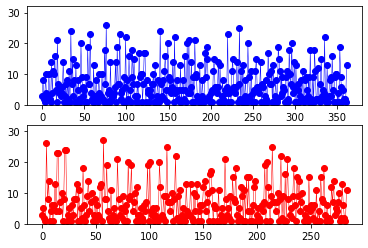

In [2]:
files_hc = Path('./data/hra/tf-idf_control/').glob('*.csv')
files_ad = Path('./data/hra/tf-idf_dementia/').glob('*.csv')

x1 = pd.read_csv(next(files_hc))
x2 = pd.read_csv(next(files_ad))

ax1 = plt.subplot(2,1,1)
ax1.plot(x1['index'],x1['x'],marker='o',color='blue',linewidth=0.5)
plt.ylim([0,32])

ax2 = plt.subplot(2,1,2)
ax2.plot(x2['index'],x2['x'],marker='o',color='red',linewidth=0.5)
plt.ylim([0,32])

Text(0.5, 1.0, 'IFS Plot Dementia 1')

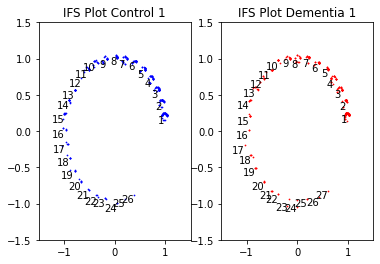

In [3]:
def ifs(states,k,alpha):
    x = []
    y = []
    x.append(0)
    y.append(0)

    for i in range(len(states)):
        x.append(alpha*x[i]+np.cos(states[i]*2*np.pi/k))
        y.append(alpha*y[i]+np.sin(states[i]*2*np.pi/k))
    
    ifs_df = pd.DataFrame({'xaddress':x, 'yaddress':y})
    ifs_df = ifs_df.drop(index=0) # drop first row

    return ifs_df

num_tokens = 32
alpha = 0.05

sig1 = x1['x']
ifs_hc = ifs(sig1,num_tokens,alpha)
ax1 = plt.subplot(1,2,1)
ax1.scatter(ifs_hc['xaddress'],ifs_hc['yaddress'],s=0.5,color='blue')
for i in range(num_tokens):
    token_idx = np.where(sig1 == (i+1))[0]
    if np.size(token_idx) == 0 :
        continue
    c = ifs_hc.iloc[token_idx,:].mean(axis=0)
    plt.text(c['xaddress'],c['yaddress'],str(i+1),horizontalalignment='right',verticalalignment='top')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('IFS Plot Control 1')

sig2 = x2['x']
ifs_ad = ifs(sig2,num_tokens,alpha)
ax2 = plt.subplot(1,2,2)
ax2.scatter(ifs_ad['xaddress'],ifs_ad['yaddress'],s=0.5,color='red')
for i in range(num_tokens):
    token_idx = np.where(sig2 == (i+1))[0]
    if np.size(token_idx) == 0:
        continue
    c = ifs_ad.iloc[token_idx,:].mean(axis=0)
    plt.text(c['xaddress'],c['yaddress'],str(i+1),horizontalalignment='right',verticalalignment='top')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('IFS Plot Dementia 1')

### Extract HRA feature

In [2]:
def heterorecurrence1(ifs_coord,sig,order):
    idx = np.where(sig == order)[0]
    if np.size(idx) != 0:
        rr = np.power(len(idx),2) / np.power(len(sig),2)
        
        rmx = cerecurr_y(ifs_coord.iloc[idx,:])
        trir = np.triu(rmx,k=1)
        flatr = trir.flatten()
        flatr = flatr[flatr != 0]
        
        if np.size(flatr) == 0:
            rent = 0            
            rmean = 0
        else:
            hist_count = np.histogram(flatr,bins='auto')[0]
            prob = hist_count/np.sum(hist_count)
            prob = prob[prob != 0]
            rent = np.sum(prob*(-np.log(prob)))
            rmean = np.mean(flatr)            
    else:
        rr = 0
        rent = 0
        rmean = 0
    return (rr,rent,rmean)
            

def heterorecurrence2(ifs_coord,sig,o1,o2):
    idx1 = np.where(sig == o1)[0]
    if np.size(idx1) != 0:
        idx2 = np.where(sig.iloc[idx1] == o2)[0]
        if np.size(idx2) != 0:
            rr = np.power(len(idx2),2) / np.power(len(sig),2)
            
            rmx = cerecurr_y(ifs_coord.iloc[idx2,:])
            trir = np.triu(rmx,k=1)
            flatr = trir.flatten()
            flatr = flatr[flatr != 0]
            
            if np.size(flatr) == 0:
                rent = 0
                rmean = 0
            else:
                hist_count = np.histogram(flatr,bins='auto')[0]
                prob = hist_count/np.sum(hist_count)
                prob = prob[prob != 0]
                rent = np.sum(prob*(-np.log(prob)))
                rmean = np.mean(flatr)
        else:
            rr = 0
            rent = 0
            rmean = 0
    else:
        rr = 0
        rent = 0
        rmean = 0
    return (rr,rent,rmean)
    
def cerecurr_y(ifs_coord):
    n = ifs_coord.shape[0]
    buff = np.empty([n,n])
    
    for i in range(n):
        for j in range(n):
            d = np.linalg.norm(ifs_coord.iloc[i,:]-ifs_coord.iloc[j,:])
            buff[i,j] = d
            buff[j,i] = d
    return buff

def hra_features(p,num_tokens,alpha):
    file_paths = Path(p).glob('*.csv')
    fsize = len(list(file_paths))
    file_paths = Path(p).glob('*.csv')
    
    hr_feat_mx = np.empty((0,3*num_tokens+num_tokens*num_tokens*3))
    for n,f, in enumerate(file_paths):
        if (n%5) == 0:
            print(f'Progress: {np.round(n/fsize,2)} %')
        
        sig = pd.read_csv(f)
        sig = sig.x
        ifs_coord = ifs(sig,num_tokens,alpha)
        
        rr1 = []
        rent1 = []
        rmean1 = []
        hr_feat2_list = []
        
        # 1st order
        for i in range(1,num_tokens+1):
            hr_feat1 = heterorecurrence1(ifs_coord,sig,i)
            rr1.append(hr_feat1[0])
            rent1.append(hr_feat1[1])
            rmean1.append(hr_feat1[2])
            
            rr2 = []
            rent2 = []
            rmean2 = []
            # 2nd order
            for j in range(1,num_tokens+1):
                hr_feat2 = heterorecurrence2(ifs_coord,sig,i,j)
                rr2.append(hr_feat2[0])
                rent2.append(hr_feat2[1])
                rmean2.append(hr_feat2[2])
            hr_feat2_list = hr_feat2_list+rr2+rent2+rmean2
        row = rr1+rent1+rmean1+hr_feat2_list
        np.append(hr_feat_mx,np.array([row]),axis=0)
    return hr_feat_mx
        
phc = './data/hra/tf-idf_control/'
pad = './data/hra/dementia'
num_tokens = 32
alpha = 0.04

feat_mx_hc = hra_features(phc, num_tokens, alpha)
feat_mx_ad = hra_features(pad, num_tokens, alpha)

SyntaxError: invalid syntax (894354272.py, line 11)

# Classifiers

              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        31
         1.0       0.69      0.69      0.69        52

    accuracy                           0.61        83
   macro avg       0.59      0.59      0.59        83
weighted avg       0.61      0.61      0.61        83



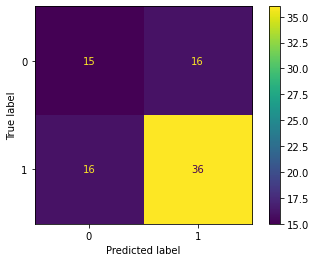

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

feat_mx = np.loadtxt(Path('./data/hra/tfidf_hrq_mx2.csv'),delimiter=',')
feat_mx = feat_mx[:,np.any(feat_mx,axis=0)]

num_hc = 243
y = np.zeros(feat_mx.shape[0])
y[num_hc:] = 1

feat_mx_train,feat_mx_test,y_train,y_test = train_test_split(feat_mx,y,train_size=0.85,random_state=1)
pipe = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000,n_jobs=4))
pipe.fit(feat_mx_train,y_train)
yhat = pipe.predict(feat_mx_test)

cm = metrics.confusion_matrix(y_test,yhat)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
print(metrics.classification_report(y_test,yhat))